In [70]:
import tensorflow as tf
from keras import layers
from keras import models

In [71]:
model = models. Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2))) # to downsample feature map using it.
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))

In [72]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.add(layers.Flatten())
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
__________________________________________________

In [74]:
model.add(layers.Dense(64, activation = 'relu'))

In [75]:
model.add(layers.Dense(10, activation = 'softmax'))

In [76]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [77]:
from keras.datasets import mnist

In [78]:
from keras.utils.np_utils import to_categorical

In [79]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [80]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [82]:
train_images = train_images.reshape((60000, 28, 28, 1)) # as convnet has input shape = (28, 28, 1)

In [83]:
train_images[0].shape

(28, 28, 1)

In [84]:
train_images = train_images.astype('float32')/255

In [85]:
test_images = test_images.reshape((10000, 28, 28 ,1))

In [86]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [87]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [88]:
x_val = train_images[:10000]
partial_x_train = train_images[10000:]
x_val.shape
partial_x_train.shape

(50000, 28, 28, 1)

In [89]:
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [90]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 5,
    batch_size = 64,
    validation_data = (x_val, y_val)
)

Epoch 1/5
782/782 [==============================] - 120s 149ms/step - loss: 0.1859 - accuracy: 0.9434 - val_loss: 0.0627 - val_accuracy: 0.9823
Epoch 2/5
782/782 [==============================] - 114s 145ms/step - loss: 0.0494 - accuracy: 0.9846 - val_loss: 0.0425 - val_accuracy: 0.9872
Epoch 3/5
782/782 [==============================] - 109s 139ms/step - loss: 0.0336 - accuracy: 0.9895 - val_loss: 0.0536 - val_accuracy: 0.9865
Epoch 4/5
782/782 [==============================] - 113s 144ms/step - loss: 0.0254 - accuracy: 0.9923 - val_loss: 0.0420 - val_accuracy: 0.9892
Epoch 5/5
782/782 [==============================] - 109s 140ms/step - loss: 0.0204 - accuracy: 0.9940 - val_loss: 0.0342 - val_accuracy: 0.9909


In [94]:
history_dict = history.history

In [110]:
history_dict.keys()
epoch = 5
epochs = range(1, epoch+1)

In [111]:
history_dict.values()

dict_values([[0.18592087924480438, 0.0494159460067749, 0.03359820321202278, 0.02539753168821335, 0.020414022728800774], [0.9433799982070923, 0.9846400022506714, 0.9894599914550781, 0.9922599792480469, 0.9940199851989746], [0.06271030008792877, 0.042500562965869904, 0.05356701835989952, 0.04204605892300606, 0.03417947515845299], [0.9822999835014343, 0.9872000217437744, 0.9865000247955322, 0.9891999959945679, 0.9908999800682068]])

In [112]:
import matplotlib.pyplot as plt

In [113]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

Text(0, 0.5, 'Loss')

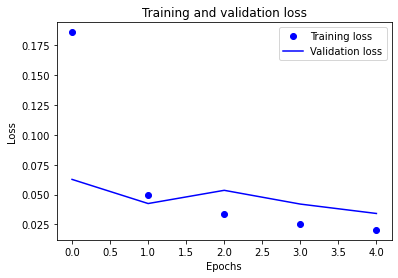

In [114]:
plt.plot(loss, 'bo', label = "Training loss")
plt.plot(val_loss, 'b', label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [115]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, epoch+1)

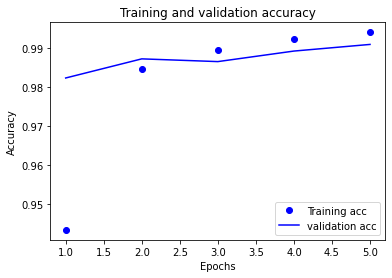

In [116]:
plt.plot(epochs, acc_values, 'bo', label = "Training acc")
plt.plot(epochs, val_acc_values, 'b', label = "validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [117]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 10s 29ms/step - loss: 4.3093 - accuracy: 0.9931


In [119]:
test_acc

0.9930999875068665

# So,  Here a basic convnet has a accuracy of 99.3%.